In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_csv = pd.merge(ride_data, city_data, how="left", on=["city"])

# Display the data table for preview
combined_csv.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

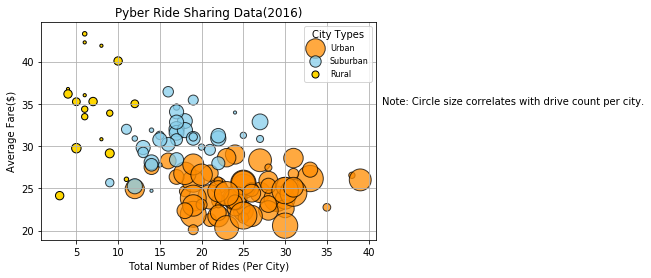

In [14]:
# x coordinates
# total number of rides (per city)
urban = combined_csv[combined_csv.type == 'Urban']
suburban = combined_csv[combined_csv.type == 'Suburban']
rural = combined_csv[combined_csv.type == 'Rural']

# urban
x_axis_urban = urban.groupby(["city"]).count()["ride_id"]
y_axis_urban = urban.groupby(["city"]).mean()["fare"]
z_axis_urban = urban.groupby(["city"]).mean()["driver_count"]

# suburban
x_axis_suburban = suburban.groupby(["city"]).count()["ride_id"]
y_axis_suburban = suburban.groupby(["city"]).mean()["fare"]
z_axis_suburban = suburban.groupby(["city"]).mean()["driver_count"]

# rural 
x_axis_rural = rural.groupby(["city"]).count()["ride_id"]
y_axis_rural = rural.groupby(["city"]).mean()["fare"]
z_axis_rural = rural.groupby(["city"]).mean()["driver_count"]

# make scatter plot
plot_show = plt.scatter(x_axis_urban, y_axis_urban, s=z_axis_urban*10,
                        c="darkorange",edgecolors="black",alpha=.75)
plot_show_suburban = plt.scatter(x_axis_suburban, y_axis_suburban,s=z_axis_suburban*10,
                                c="skyblue", edgecolors="black", alpha=.75)
plot_show_suburban = plt.scatter(x_axis_rural, y_axis_rural, s=z_axis_rural*10,
                                c="gold",edgecolors="black",alpha=1)
plt.grid() 
plt.title("Pyber Ride Sharing Data(2016)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.legend(["Urban", "Suburban","Rural"],fontsize=8, title="City Types")
t = ("Note: Circle size correlates with drive count per city.")
plt.text(73,35,t, ha='right')
plt.savefig("PyberScatterPlot.png")
plt.show()

## Total Fares by City Type

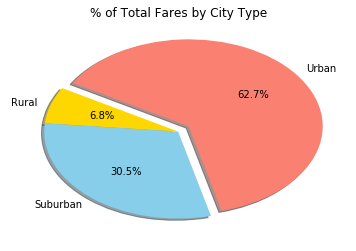

In [23]:
# Total fare by city type
# Calculate Type Percents
# Title % of total fares by city type
plt.title("% of Total Fares by City Type")
fare_by_type = combined_csv.groupby("type").sum()["fare"]
type_column = ["Rural", "Suburban","Urban"]
colors = ["gold","skyblue","salmon"]

explode = (0, 0,0.1)
plt.pie(fare_by_type,labels=type_column,explode=explode,
        colors=colors,autopct="%1.1f%%", shadow=True,
        startangle=150)
savefig=("../Pyber/TotalFares.png")

In [16]:
# Show Figure
plt.show()

## Total Rides by City Type

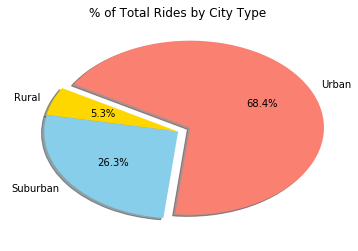

In [17]:
plt.title("% of Total Rides by City Type")
for column in combined_csv:
    fare_by_type = combined_csv.groupby("type").count()["fare"]
    type_column = ["Rural", "Suburban","Urban"]
    explode = (0, 0, 0.1)
    colors = ["gold","skyblue","salmon"]

plt.pie(fare_by_type,labels=type_column, explode=explode,
        colors=colors, autopct="%1.1f%%", shadow=True,
        startangle=150)
plt.savefig("TotalRides.png")

In [18]:
# Show Figure
plt.show()

## Total Drivers by City Type

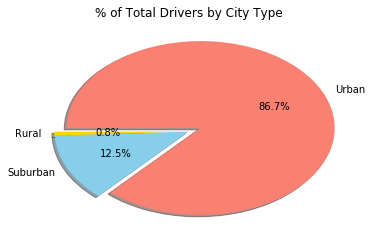

In [19]:
plt.title("% of Total Drivers by City Type")
fare_by_type = combined_csv.groupby("type").sum()["driver_count"]
type_column = ["Rural","Suburban","Urban"]
colors = ["gold","skyblue","salmon"]
explode = (0, 0, 0.1)

plt.pie(fare_by_type,labels=type_column,colors=colors,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.savefig("TotalDrivers.png")

In [20]:
# Show Figure
plt.show()